# Import Module

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers

import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataaset

In [2]:
df_train = pd.read_csv("dataset/train.csv")
df_test = pd.read_csv("dataset/test.csv")

# Data Processing

In [3]:
df_train

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
749995,749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0


In [4]:
df_train.isna().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4   Weight      250000 non-null  float64
 5   Duration    250000 non-null  float64
 6   Heart_Rate  250000 non-null  float64
 7   Body_Temp   250000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [7]:
df_train['gender_encoded'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_train = df_train.drop(columns=['Sex', 'id'])

In [8]:
df_test['gender_encoded'] = df_test['Sex'].map({'female': 0, 'male': 1})
df_test = df_test.drop(columns=['Sex', 'id'])

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             750000 non-null  int64  
 1   Height          750000 non-null  float64
 2   Weight          750000 non-null  float64
 3   Duration        750000 non-null  float64
 4   Heart_Rate      750000 non-null  float64
 5   Body_Temp       750000 non-null  float64
 6   Calories        750000 non-null  float64
 7   gender_encoded  750000 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 45.8 MB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             250000 non-null  int64  
 1   Height          250000 non-null  float64
 2   Weight          250000 non-null  float64
 3   Duration        250000 non-null  float64
 4   Heart_Rate      250000 non-null  float64
 5   Body_Temp       250000 non-null  float64
 6   gender_encoded  250000 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 13.4 MB


## Exploratory Data Analysis (EDA)

In [11]:
correlation_matrix = df_train.corr()

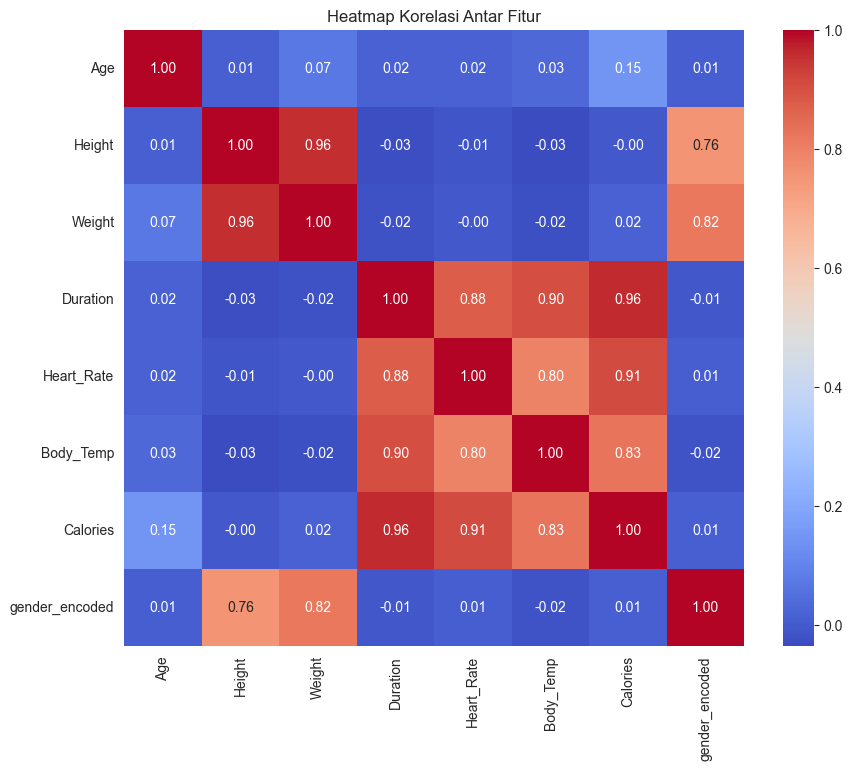

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(
  correlation_matrix,
  annot=True,
  cmap='coolwarm',
  fmt='.2f'
)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

# Training Model

In [13]:
from sklearn.preprocessing import StandardScaler

X_train = df_train.drop('Calories', axis=1)
y_train = df_train['Calories']

In [14]:
X_test = df_test

In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Arsitecture Model

In [16]:
input_features = X_train_scaled.shape[1]

In [17]:
model = models.Sequential([
    # Lapisan Input dan Lapisan Tersembunyi Pertama
    layers.Dense(64, activation='relu', input_shape=[input_features]),
    # Lapisan Tersembunyi Kedua
    layers.Dense(64, activation='relu'),
    # Lapisan Tersembunyi Ketiga
    layers.Dense(32, activation='relu'),
    # Lapisan Output untuk Regresi (1 neuron, tanpa aktivasi)
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

print("--- Arsitektur Model ---")
model.summary()
print("\n")

D:\projects\python\kecerdasan-buatan\calories\.venv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--- Arsitektur Model ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,785 (26.50 KB)

 Trainable params: 6,785 (26.50 KB)

 Non-trainable params: 0 (0.00 B)

## Training Model

In [18]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)
print("--- Pelatihan Model Selesai ---\n")

Epoch 1/15
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - loss: 60.9461 - mean_absolute_error: 2.9664 - val_loss: 13.2891 - val_mean_absolute_error: 2.2230
Epoch 2/15
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - loss: 14.5839 - mean_absolute_error: 2.3282 - val_loss: 14.5488 - val_mean_absolute_error: 2.3654
Epoch 3/15
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 67s 4ms/step - loss: 14.3528 - mean_absolute_error: 2.3007 - val_loss: 13.2274 - val_mean_absolute_error: 2.2167
Epoch 4/15
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 74s 4ms/step - loss: 14.2164 - mean_absolute_error: 2.2867 - val_loss: 13.1521 - val_mean_absolute_error: 2.2071
Epoch 5/15
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 71s 4ms/step - loss: 14.0593 - mean_absolute_error: 2.2716 - val_loss: 13.4237 - val_mean_absolute_error: 2.2640
Epoch 6/15
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - loss: 14.0091 - mean_absolute_error: 2.2695 - val_loss: 13.5918 - val_mean_absolute_error: 2.2581
Epoch 7/15
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step -

## VISUALISASI HASIL TRAINING (Tidak ada perubahan)

--- Membuat Grafik Hasil Pelatihan ---
Kolom yang tersedia di history: Index(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error',
       'epoch'],
      dtype='object')


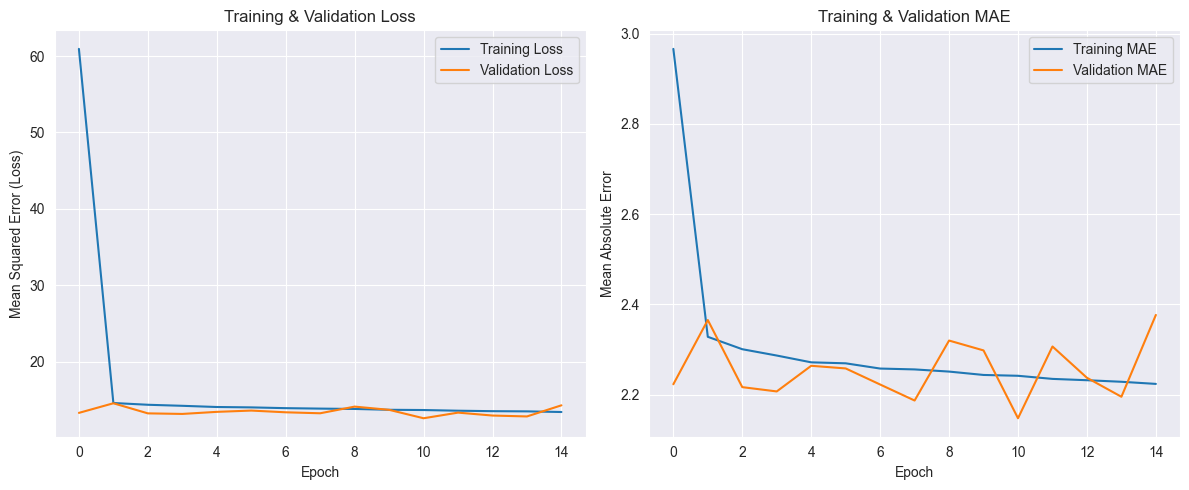

In [19]:
print("--- Membuat Grafik Hasil Pelatihan ---")
# Membuat DataFrame dari riwayat training untuk kemudahan plotting
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Tips: Anda bisa jalankan baris ini untuk melihat semua nama kolom yang tersedia
print("Kolom yang tersedia di history:", hist.columns)

# Membuat plot
plt.figure(figsize=(12, 5))

# Plot untuk Loss (ini sudah benar)
plt.subplot(1, 2, 1)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (Loss)')
plt.plot(hist['epoch'], hist['loss'], label='Training Loss')
plt.plot(hist['epoch'], hist['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.grid(True)
plt.legend()

# Plot untuk MAE (dengan nama kolom yang sudah diperbaiki)
plt.subplot(1, 2, 2)
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Training MAE')

# ===== PERBAIKAN DI BARIS INI =====
plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label='Validation MAE') 
# ==================================

plt.title('Training & Validation MAE')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
predictions = model.predict(X_test_scaled)

# Melihat 5 hasil prediksi pertama
print("Contoh 5 hasil prediksi kalori pada data test:")
print(predictions[:5].flatten())

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
Contoh 5 hasil prediksi kalori pada data test:
[ 26.553062 106.395325  85.59959  124.10967   74.97847 ]


In [21]:
from sklearn.metrics import r2_score

# Lakukan prediksi pada data training yang sudah di-scale
y_pred_train = model.predict(X_train_scaled)

# Bandingkan hasil prediksi (y_pred_train) dengan nilai asli (y_train)
r2 = r2_score(y_train, y_pred_train)

print(f"Nilai R-squared (R²) pada data training: {r2:.4f}")
print(f"Artinya, model ini mampu menjelaskan sekitar {r2:.2%} dari variasi data kalori.")

23438/23438 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step
Nilai R-squared (R²) pada data training: 0.9963
Artinya, model ini mampu menjelaskan sekitar 99.63% dari variasi data kalori.
